# Vaccination progress

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
matplotlib.rc('figure', figsize=(15, 10))

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Download data

In [4]:
# SSL error, broken server config need to make download less secure... :((
!mv data data-$(date --iso)
!mkdir data
!cd data && wget --cipher 'DEFAULT:!DH' https://info.gesundheitsministerium.gv.at/data/timeline-eimpfpass.csv

mv: cannot move 'data' to 'data-2021-07-19/data': Directory not empty
mkdir: cannot create directory ‘data’: File exists
--2021-07-19 17:27:49--  https://info.gesundheitsministerium.gv.at/data/timeline-eimpfpass.csv
Resolving info.gesundheitsministerium.gv.at (info.gesundheitsministerium.gv.at)... 2a00:1610:0:50::1bb:4a, 194.48.237.240
Connecting to info.gesundheitsministerium.gv.at (info.gesundheitsministerium.gv.at)|2a00:1610:0:50::1bb:4a|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 761307 (743K) [text/csv]
Saving to: ‘timeline-eimpfpass.csv.2’

timeline-eimpfpass. 100%[===================>] 743,46K  2,14MB/s    in 0,3s    

2021-07-19 17:27:49 (2,14 MB/s) - ‘timeline-eimpfpass.csv.2’ saved [761307/761307]



## Load data & preprocess

In [5]:
def dateparse(x):
    return datetime.strptime(x[:10], '%Y-%m-%d')

### Vaccinations

In [6]:
vaccinations_raw = pd.read_csv('data/timeline-eimpfpass.csv', delimiter=';',
                           parse_dates=['Datum'], decimal=',',
                           date_parser=dateparse)

#bundesland_id = 10
#title = 'Austria'

bundesland_id = 9
title = 'Vienna'

# note: Teilgeimpfte means "people with at least one vaccination"
vaccinations = vaccinations_raw[vaccinations_raw.BundeslandID == bundesland_id].set_index('Datum').sort_index()
teilgeimpfte = vaccinations.Teilgeimpfte
vollimmunisierte = vaccinations.Vollimmunisierte
shots_total =  teilgeimpfte + vollimmunisierte - vaccinations.EingetrageneImpfungenJanssen

population = vaccinations['Bevölkerung']

In [7]:
shots_total.diff().resample('W').sum()

Datum
2020-12-27         0.0
2021-01-03      1767.0
2021-01-10      3680.0
2021-01-17     16016.0
2021-01-24     22958.0
2021-01-31      8993.0
2021-02-07     18098.0
2021-02-14     22619.0
2021-02-21     18242.0
2021-02-28     18522.0
2021-03-07     28807.0
2021-03-14     46675.0
2021-03-21     43403.0
2021-03-28     41339.0
2021-04-04     53333.0
2021-04-11     57121.0
2021-04-18     66828.0
2021-04-25     86661.0
2021-05-02     78390.0
2021-05-09     86767.0
2021-05-16     80484.0
2021-05-23    114405.0
2021-05-30    106648.0
2021-06-06    125306.0
2021-06-13    112944.0
2021-06-20    113368.0
2021-06-27    127926.0
2021-07-04    127008.0
2021-07-11    104928.0
2021-07-18     81963.0
Freq: W-SUN, dtype: float64

## Analysis of vaccinations

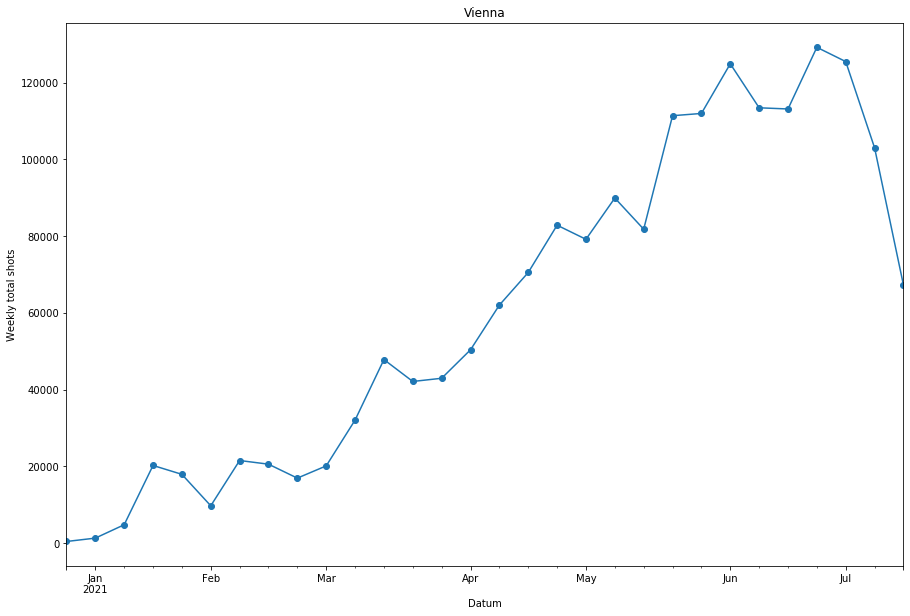

In [8]:
shots_total.diff().resample('W-MON').sum().plot(marker='o')
plt.title(title)
plt.ylabel('Weekly total shots');

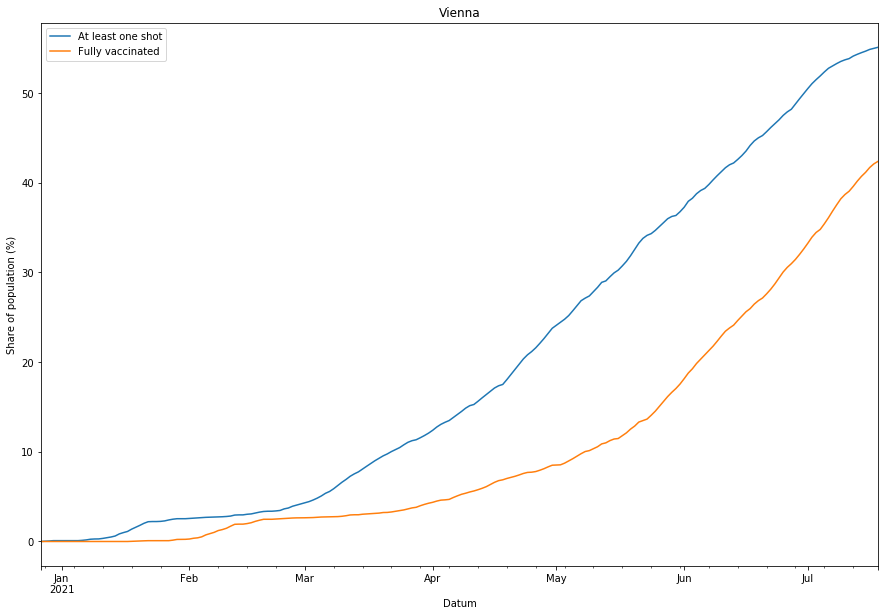

In [9]:
(100 * teilgeimpfte / population).plot(label='At least one shot')
(100 * vollimmunisierte / population).plot(label='Fully vaccinated')
plt.title(title)
plt.legend()
plt.ylabel('Share of population (%)');

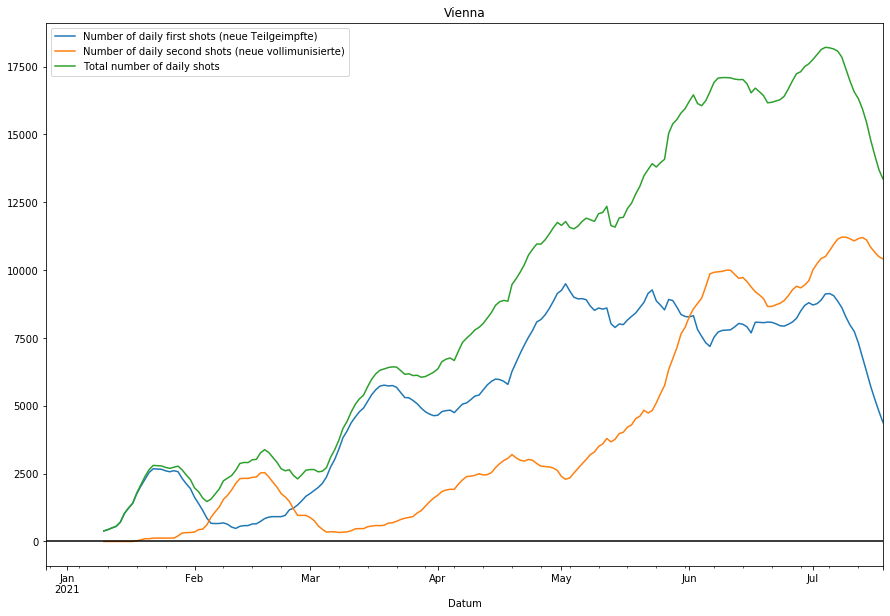

In [10]:
teilgeimpfte_filtered = teilgeimpfte.diff().rolling(14).mean()
vollimmunisierte_filtered = vollimmunisierte.diff().rolling(14).mean()
shots_total_filtered = shots_total.diff().rolling(14).mean()


teilgeimpfte_filtered.plot.line(label='Number of daily first shots (neue Teilgeimpfte)', legend=True)
vollimmunisierte_filtered.plot(label='Number of daily second shots (neue vollimunisierte)', legend=True)
shots_total_filtered.plot(label='Total number of daily shots', legend=True)

plt.title(title)
plt.axhline(color='k');

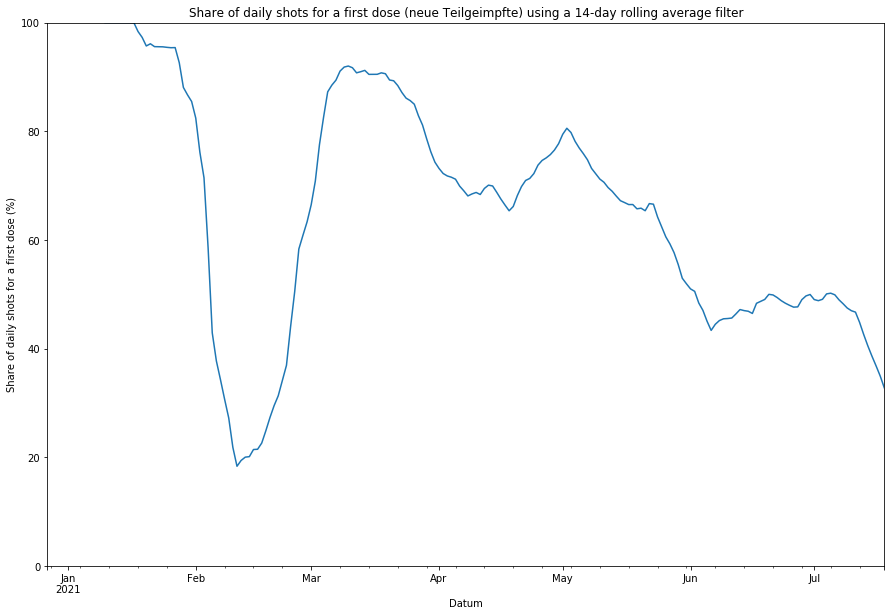

In [11]:
(100 * teilgeimpfte_filtered / shots_total_filtered).plot.line('-k')
plt.title(title)
plt.ylim(0, 100)
plt.title('Share of daily shots for a first dose (neue Teilgeimpfte) using a 14-day rolling average filter')
plt.ylabel('Share of daily shots for a first dose (%)');